In [1]:
# import minirats
import minirats.utils.py.readwrite.ramses_info as ri

# import ratatouille
from ratatouille import Marion_stuff as ms
from ratatouille import readNsave as ras
from ratatouille import plotutils as put

from ratatouille import maps

# imports others
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.facecolor']='w'
plt.rcParams['font.size'] = 14

In [3]:
genpath = '/mnt/lyoccf/scratch/mrey/outputs/3_ramcral/'
folders = ['2_Rex/5_m_star=0.4_n_star=25/', '1_Mau/2_sf_lam=4/','3_Kan/1_weak/']

timestep  = 17

labels = ['Agertz', 'Kimm', 'Kretschmer']

No handles with labels found to put in legend.


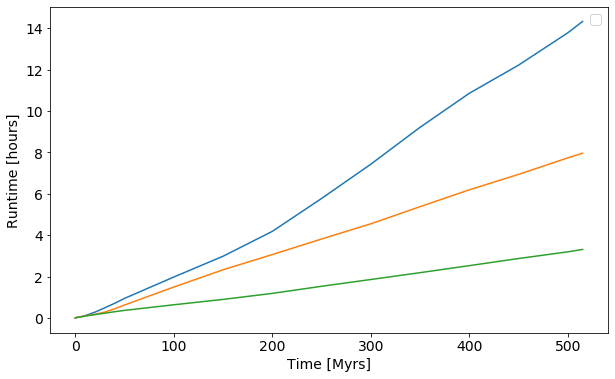

In [4]:
ms.comp_run_time(genpath, folders, labels, fmt='h')

---

# Load stars & cells properties individually

In [4]:
want2load_stats=False
which_folder= 2

if want2load_stats:
    RamsesDir = genpath + folders[which_folder]
    info = ri.rd_info(timestep,RamsesDir)
    # Load stars
    star_mass,star_x,star_y,star_z,star_id,star_age,star_vx,star_vy,star_vz,star_mets, star_minit \
        = ras.extract_stars(RamsesDir, timestep, ['star_mass','star_x','star_y','star_z','star_id','star_age','star_vx','star_vy','star_vz','star_mets','star_minit'], factor=1, hnum=None, use_yt=True)

    # Cells data
    vars2load = ['cell_dx','rho','nH','pres','vx','vy','vz','xHII','xHeII','xHeIII','mu','T','mass','Z','cell_pos','cell_l']
    cell_dx, rho, nH, pres, vx, vy, vz, xHII, xHeII, xHeIII, mu, T, mass, Z, cell_pos, cell_l  = ras.extract_cells(RamsesDir, timestep, vars2load, factor=1)

    g2Msun = 1./1.9891e33
    mass*=g2Msun
    star_mass*=g2Msun
    star_minit*=g2Msun

---

# PDFs

### Mass

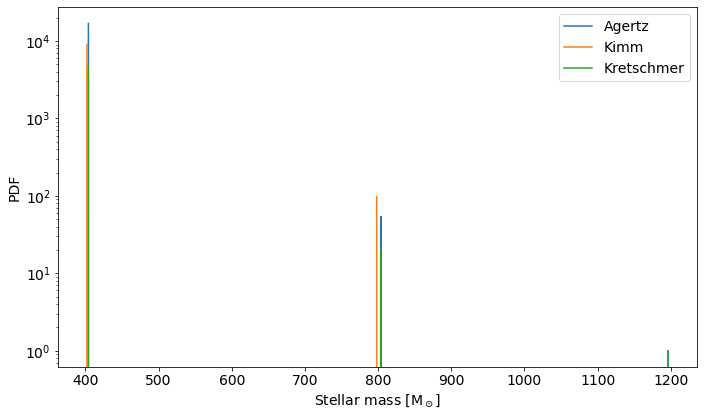

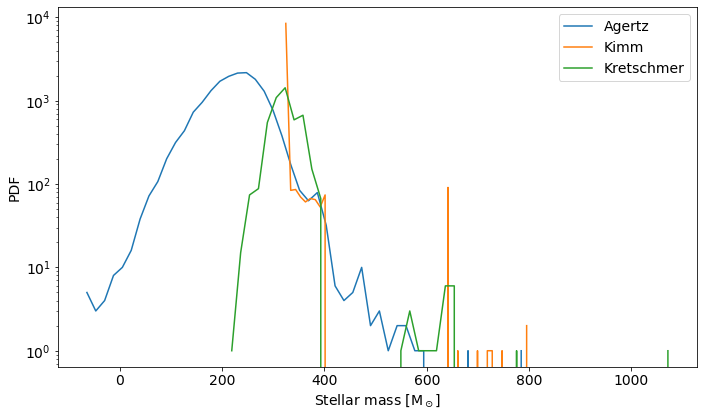

In [6]:
put.plot_pdfs2('star_minit', genpath, folders, timestep, labels, density=False, bins=100, \
    x_log=False, y_log=True, xlims=None, ylims=None, savefig=False, saveinfile=True)
put.plot_pdfs2('star_mass', genpath, folders, timestep, labels, density=False, bins=50, \
    x_log=False, y_log=True, xlims=None, ylims=None, savefig=False, saveinfile=True)

### T and $\rho$

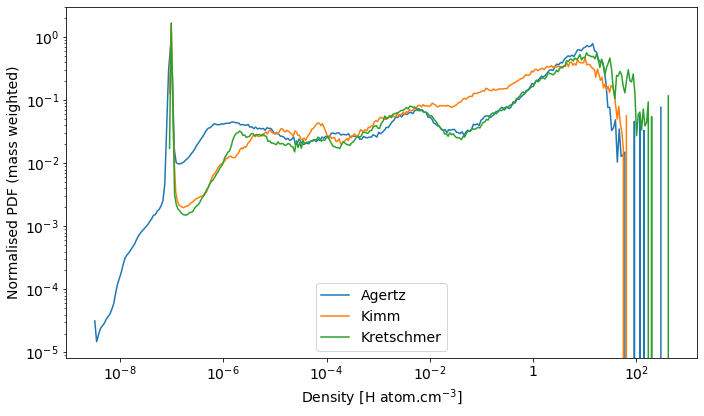

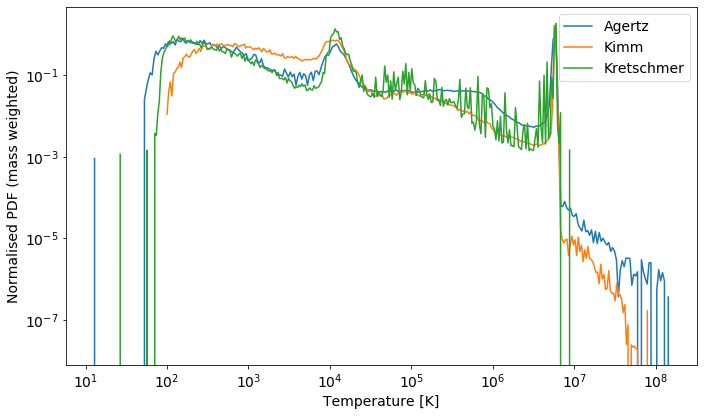

In [7]:
put.plot_pdfs2('nH', genpath, folders, timestep, labels, weight='mass', density=True, bins=300, \
    x_log=True, y_log=True, xlims=None, ylims=None, savefig=False, saveinfile=True)
put.plot_pdfs2('T', genpath, folders, timestep, labels, weight='mass', density=True, bins=300, \
    x_log=True, y_log=True, xlims=None, ylims=None, savefig=False, saveinfile=True)

### z velocity split into 3 temperature zones

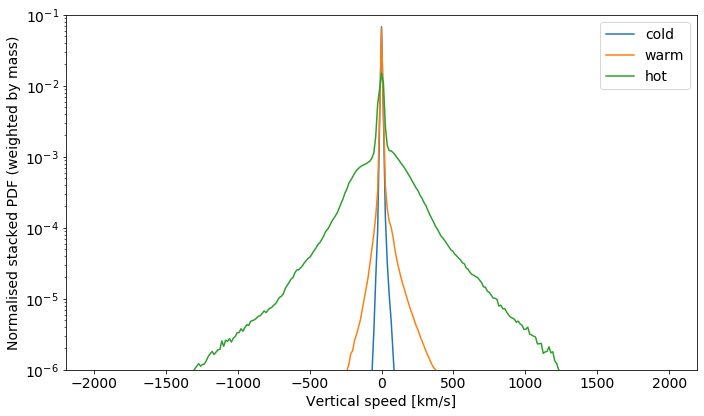

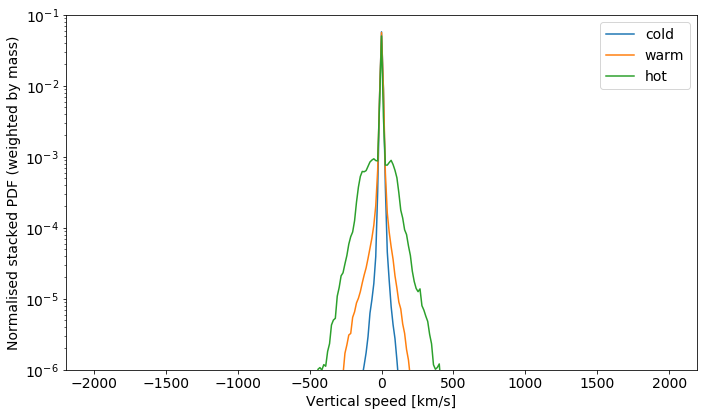

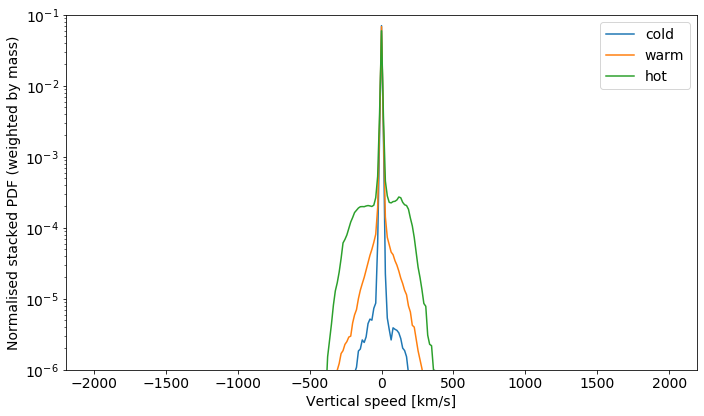

In [8]:
timesteps = [13,14,15,16,17,18] # From 300 Myrs
put.pdf_split_t_stack('vz', 'mass', genpath, folders, timesteps, density=True, bins=300, \
    x_log=False, y_log=True, xlims=None, ylims=[1e-6,1e-1], savefig=False, saveinfile=True)

---

# SFR

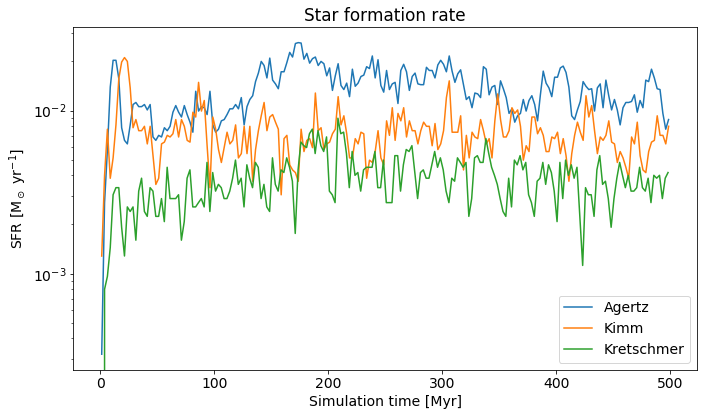

In [9]:
put.plot_sfr(genpath, folders, timestep, labels, bins=200)

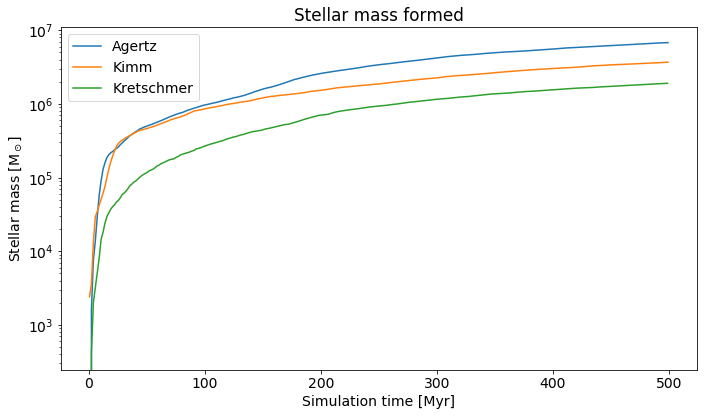

In [10]:
put.plot_mass_evol(genpath, folders, timestep, labels)

---

# Outflows

In [11]:
timesteps = np.linspace(2,18,17, dtype=int) # [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

## Function of time

### All simulations at 2 and 10 kpc

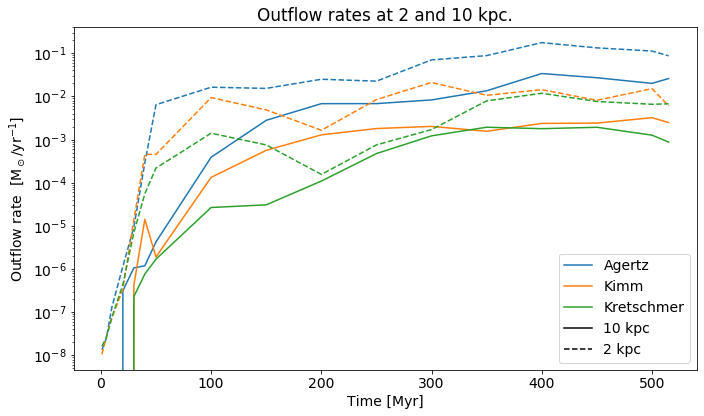

In [12]:
put.plot_outflows(genpath,folders,timesteps,labels,dist_kpc=[2,10]
                          xlims=None, ylims=None, y_log=True,savefig=False)

### Simu. by simu., decomposition into 3 temperature zones

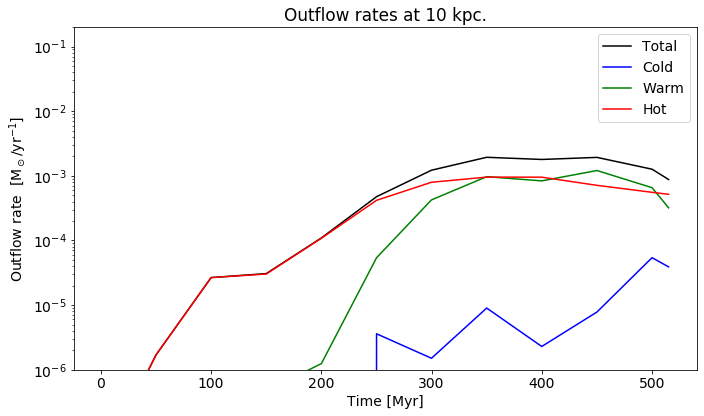

In [13]:
put.plot_outflows_T(genpath+folders[2],timesteps=timesteps,dist_kpc=[10],
                    xlims=None, ylims=[1e-6,2e-1], y_log=True,savefig=False)

## Function of radius, averaged from 300 Myrs to 515 Myrs.

 Done [##################################################] 100%  
 Done [##################################################] 100%  
 Done [##################################################] 100%  


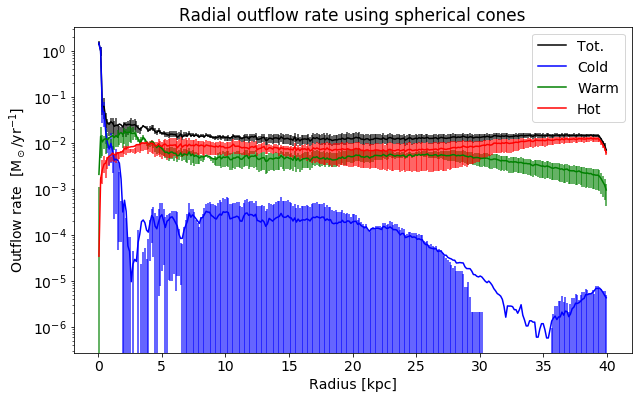

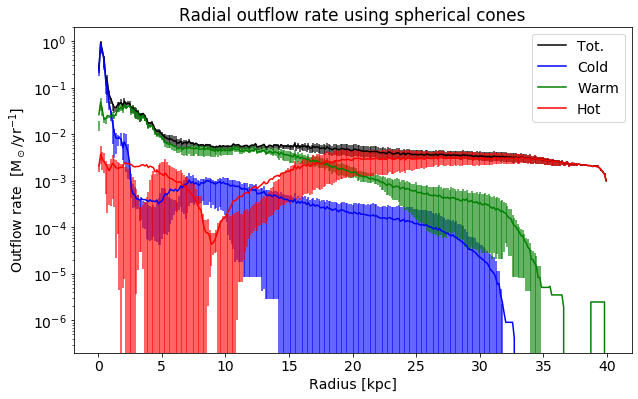

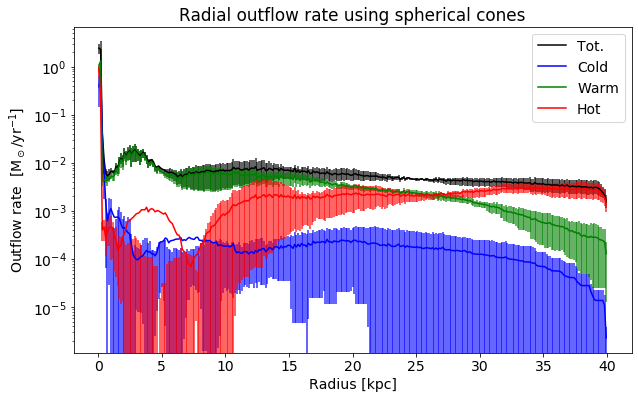

In [6]:
radmax = 40
for folder in folders:
    _, _, _, _, _, = put.plot_outflows_allrad(genpath+folder,[13,14,15,16,17, 18], radmax, \
                                              'spheres', maxangle=65)

---

# Mass loading factor

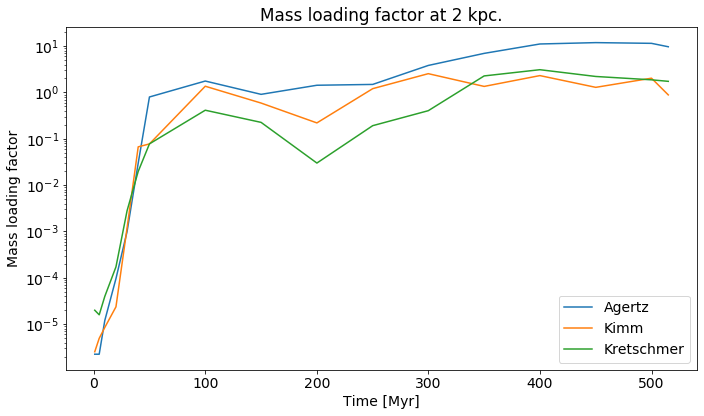

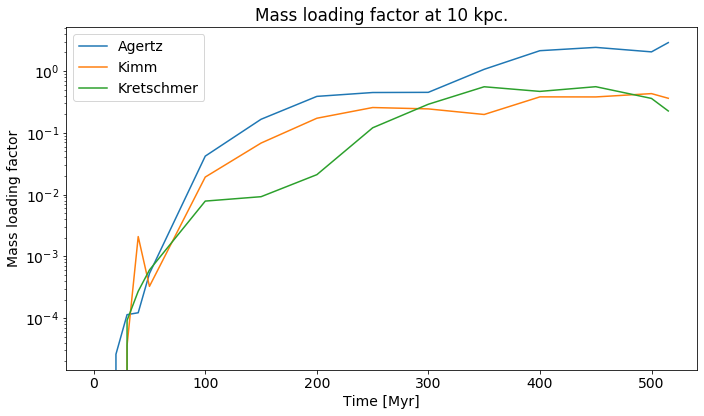

In [14]:
dist_kpc=2
put.plot_mass_load(genpath, folders, timesteps, dist_kpc, labels,\
                    xlims=None, ylims=None, y_log=True, savefig=False)
dist_kpc=10
put.plot_mass_load(genpath, folders, timesteps, dist_kpc, labels,\
                    xlims=None, ylims=None, y_log=True, savefig=False)

---

# KS relation

The size of the bins is ~ 0.988 kpc
Eq is 2.76 * Sig_gas + -6.35
The size of the bins is ~ 0.988 kpc
Eq is 2.14 * Sig_gas + -5.73
The size of the bins is ~ 0.988 kpc
Eq is 1.69 * Sig_gas + -5.67


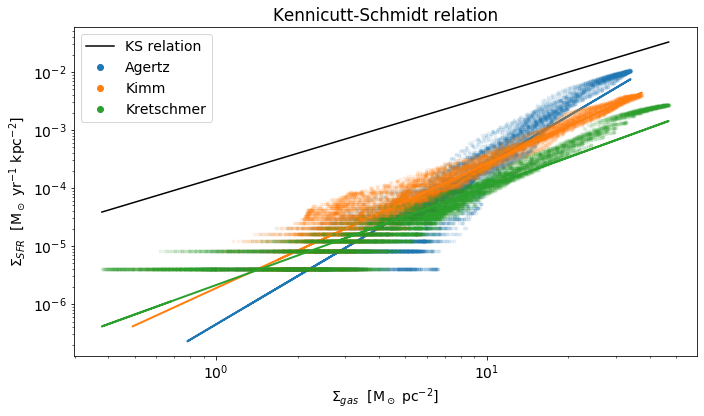

In [15]:
rad_kpc = 20
binsize_aim = 1.    # [kpc]
lim_sfr = 100       # [Myr]

put.plot_KS(genpath, folders, timestep, labels, binsize_aim, lim_sfr, \
             rad_kpc, thresh=None, IMF='Chabrier', logscale=True, plot_data=True)

### v2.0

The size of the bins is ~ 0.988 kpc
The size of the bins is ~ 0.988 kpc
The size of the bins is ~ 0.988 kpc


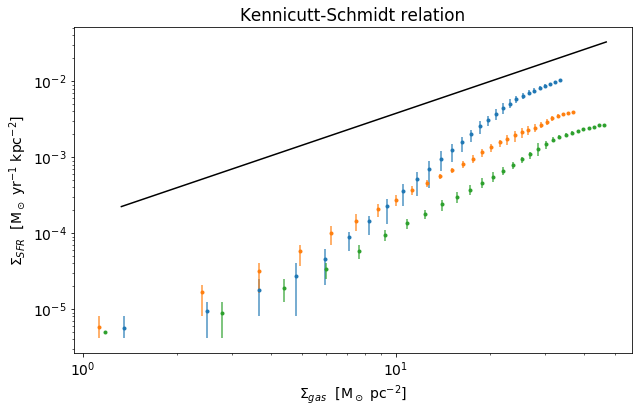

In [16]:
rad_kpc = 20
binsize_aim = 1.    # [kpc]
lim_sfr = 100       # [Myr]
put.plot_KS_better(genpath, folders, timestep, labels, binsize_aim, lim_sfr, rad_kpc, \
                    nbbins=30, rebin='4', thresh=None, IMF='Chabrier', logscale=True, \
                    plot_err=True, plot_data=False, saveinfile=True)

---

# Phase diagrams

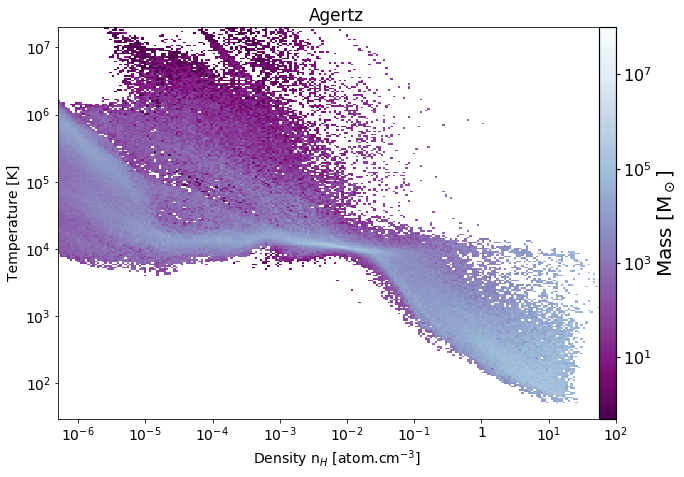

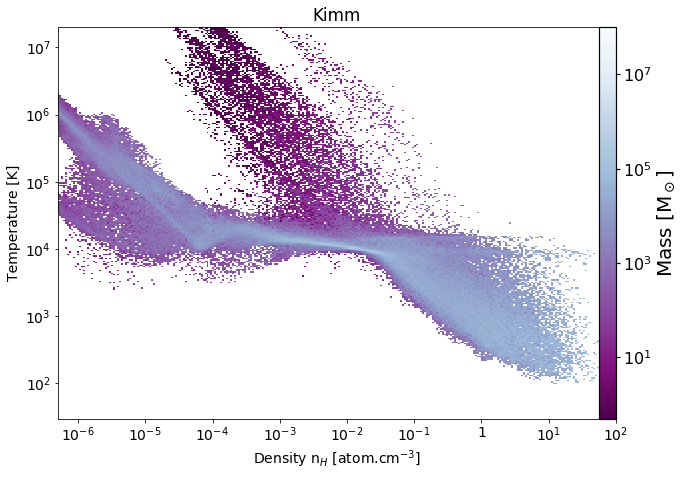

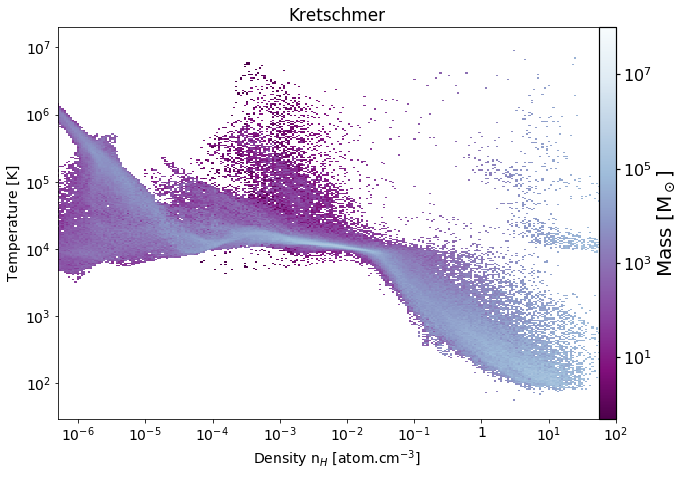

In [17]:
lims = [[5e-7, 100], [30, 2e7]]
vmin, vmax = 0.5, 1e8
put.plot_phase_diag(genpath, folders, timestep, labels, bins=300, \
                         plot_lims=lims, vmin=vmin, vmax=vmax)

### Restricted to x kpc

In [18]:
def loadstuff(genpath, folder, timestep, restrict):
    import numpy as np
    RamsesDir = genpath + folder
    info = ri.rd_info(timestep,RamsesDir)
    
    # Cells data
    rho,nH,T,mass,cell_pos,cell_l = ras.extract_cells(RamsesDir,timestep,['rho','nH','T','mass','cell_pos','cell_l'],factor=1)
    
    g2Msun = 1./1.9891e33
    mass*=g2Msun
    midbox = cell_pos.max()/2
    dist = (np.sqrt((cell_pos[:,0]-midbox)**2 + (cell_pos[:,1]-midbox)**2 + (cell_pos[:,2]-midbox)**2))/3.08568025e21

    return nH[dist<restrict], T[dist<restrict], mass[dist<restrict]

In [19]:
restrict = 5
lims = [[5e-7, 100], [30, 2e7]]
nH, T, rho = loadstuff(genpath, folders[0], 17, restrict)
nH1, T1, rho1 = loadstuff(genpath, folders[1], 17, restrict)
nH2, T2, rho2 = loadstuff(genpath, folders[2], 17, restrict)

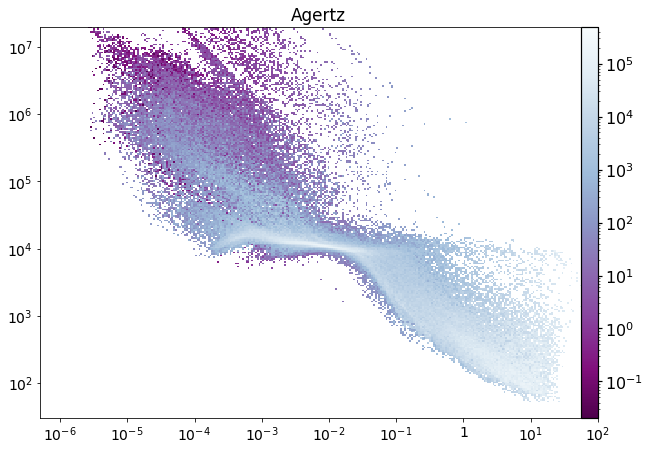

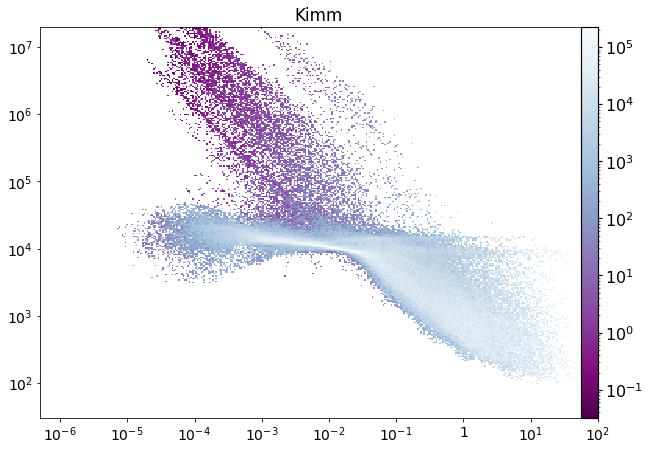

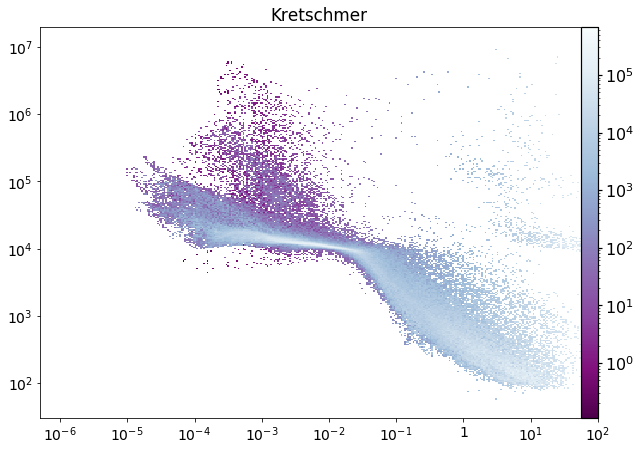

In [20]:
put.plot_phase_diag(nH, T, rho, bins=300, plot_lims=lims, title=labels[0], vmin=None, vmax=None)
put.plot_phase_diag(nH1, T1, rho1, bins=300, plot_lims=lims, title=labels[1], vmin=None, vmax=None)
put.plot_phase_diag(nH2, T2, rho2, bins=300, plot_lims=lims, title=labels[2], vmin=None, vmax=None)